# <u>Skin Cancer Detection using CNN</u>

## <u>Dataset: HAM10000, ISIC 2018</u>

### Group: A-02

### 

# Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

# Set all the Constants


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 30

# Import data into tensorflow dataset object


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../Dataset/CancerDetection",
    seed = 123,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3297 files belonging to 2 classes.


## Class Names

In [4]:
class_names = dataset.class_names
class_names

['benign', 'malignant']

## Batch and Image size

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0]


# Visualize some of the images from our dataset

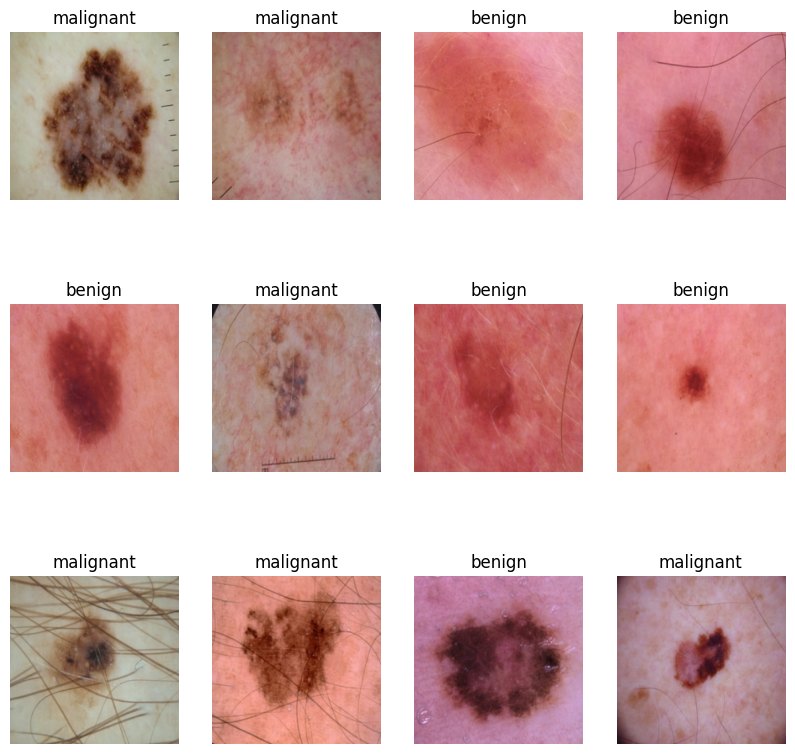

In [6]:
plt.figure(figsize=(10, 10))

for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Function to Split Dataset

## Dataset should be bifurcated into 3 subsets, namely:

    1. Training: Dataset to be used while training
    2. Validation: Dataset to be tested against while training
    3. Test: Dataset to be tested against after we trained a model

In [7]:
len(dataset)

104

In [8]:
train_size = 0.8
len(dataset)*train_size

83.2

In [9]:
train_ds = dataset.take(83)
len(train_ds)

83

In [10]:
test_ds = dataset.skip(83)
len(test_ds)

21

In [11]:
val_size = 0.1
len(dataset)*val_size

10.4

In [12]:
val_ds = test_ds.take(10)
len(val_ds)

10

In [13]:
test_ds = test_ds.skip(10)
len(test_ds)

11

# Function to Split Dataset into Training, Testing & Validating Dataset

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

83

In [17]:
len(val_ds)

10

In [18]:
len(test_ds)

11

# Cache, Shuffle, and Prefetch the Dataset

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model

## Creating a Layer for Resizing and Normalization


In [20]:
resize_and_rescale = tf.keras.Sequential([
    
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
    
])